In [52]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 

In [53]:
def tratamentoDeArquivos(arquivo):
    dados = str()
    for linha in arquivo:
        dados = linha
        break # estamos interessados na primeira linha do arquivo
    
    # transformação de string para lista
    stringSize = len(dados)
    dados = dados[1:stringSize-2]
    dados = dados.split(', ')
    
    # complementar o dataframe com valores vazios
    sizeDados = len(dados)
    difVazios = 100 - sizeDados 
    complementoDados = difVazios*[np.nan] 
    dados += complementoDados
    
    # converte os dados de string para tipo de dados numerico
    for j in range(sizeDados):
        dados[j] = int(dados[j])
        
    return dados

In [54]:
# Esse código recebe os dados em formato txt 
# salvos no repositório do projeto, e transforma em um DataFrame  

experimento = {}

# gerando lista de medidas:
listaDeMedidas = [1, 2, 3, 4, 5, 6, 7, 8]; # Posições relacionadas ao 

#add dist. de referencia. 
nomeDoArquivo = "../dados/experimento7/1.0m.txt" 
arquivo = open(nomeDoArquivo, 'r')
dados = tratamentoDeArquivos(arquivo)
coluna = '1.0 m'
experimento[coluna] = dados

sizeMedidas = len(listaDeMedidas)
for i in range(sizeMedidas):
    medida = listaDeMedidas[i]
    nomeDoArquivo = "../dados/experimento7/" + "5.0m("+ str(medida) + ").txt" 
    arquivo = open(nomeDoArquivo, 'r')
    
    # add data
    dados = tratamentoDeArquivos(arquivo)
    coluna =  '5m' + ' pos. ' + str(medida)
    experimento[coluna] = dados

# Gerando um DataFrame
experimento = pd.DataFrame(data=experimento)
experimento

,1.0 m,5m pos. 1,5m pos. 2,5m pos. 3,5m pos. 4,5m pos. 5,5m pos. 6,5m pos. 7,5m pos. 8
0,-81,-88,-80,-74,-73,-87,-84,-80,-70
1,-68,-86,-75,-76,-71,-78,-77,-81,-72
2,-68,-86,-77,-75,-71,-79,-83,-81,-70
3,-81,-86,-79,-74,-76,-87,-78,-77,-72
4,-70,-76,-77,-75,-72,-80,-70,-81,-71
5,-72,-86,-79,-75,-71,-80,-83,-87,-72
6,-73,-87,-78,-73,-77,-81,-84,-81,-71
7,-73,-80,-77,-74,-71,-87,-70,-80,-71
8,-73,-87,-78,-75,-76,-82,-81,-80,-72
9,-73,-81,-83,-75,-72,-82,-75,-81,-71


In [55]:
descricaoDosDados = experimento.describe()

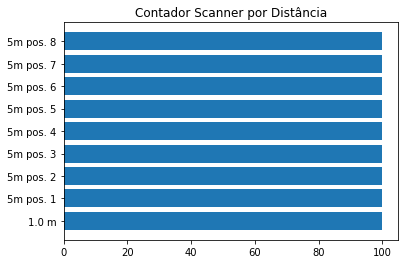

In [56]:
# grafico de barras p/ count


bars = list(descricaoDosDados.axes[1])
height = list()
y_pos = np.arange(len(bars))


for i in descricaoDosDados:
    height.append(descricaoDosDados[i][0])

plt.barh(y_pos, height)
plt.yticks(y_pos, bars)
plt.title('Contador Scanner por Distância')
plt.savefig('graficocountdescribe.png')
plt.show()




In [57]:
descricaoDosDados = experimento.describe()
descricaoDosDados

,1.0 m,5m pos. 1,5m pos. 2,5m pos. 3,5m pos. 4,5m pos. 5,5m pos. 6,5m pos. 7,5m pos. 8
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0000,100.000000,100.00000
mean,-72.720000,-81.070000,-79.890000,-74.820000,-73.150000,-84.300000,-78.7800,-81.800000,-72.05000
std,2.835846,3.977855,2.647259,0.701801,2.036907,3.471384,4.9269,2.215647,1.05768
min,-82.000000,-88.000000,-85.000000,-78.000000,-77.000000,-91.000000,-88.0000,-88.000000,-74.00000
25%,-74.000000,-85.000000,-83.000000,-75.000000,-76.000000,-87.000000,-84.0000,-82.000000,-73.00000
50%,-73.000000,-81.000000,-79.000000,-75.000000,-72.000000,-84.500000,-78.5000,-81.000000,-72.50000
75%,-71.000000,-77.000000,-78.000000,-74.000000,-72.000000,-81.000000,-76.7500,-80.000000,-71.00000
max,-66.000000,-74.000000,-75.000000,-73.000000,-71.000000,-78.000000,-70.0000,-77.000000,-70.00000


In [58]:
resultados = {'d0(m)': [], 'd(m)': [], 'β0(dB)': [],  'RSSI(dBm)' : [], "PTx(dBm)": [], 'PL(dB)': [], 'x': [], 'y': [] }

#resultados['η'] = []

d0 = 1.0 # valor fixo
d = 1.0 # distancia de medição, inicia em 1.0; 
tx = -59
f = (2.426) * math.pow(10,9)  # frenquencia do meio, Beacon BLE
c = 3 * math.pow(10,8)  
λ = c/f                 # comprimento de onda

#β0 = (4 * math.pi * d0)/ λ
#β0 = math.pow(β0,2)        # eleva ao quadrado
#β0 = 10 * math.log10(β0)      # mudando a unidade de betaZero para dB
β0 = 1.0

for i in descricaoDosDados:
    if i == '0.5m':
        continue # não estamos interessados na primeira medida; próximo 'i'
    
    RSSI = descricaoDosDados[i][5]
    pL = tx - RSSI
    
    #n = (pL - β0)/10*math.log10(d/d0)
    
    y = (pL - β0)/10
    x = math.log10(d/d0)
    
    resultados['d0(m)'].append(d0)
    resultados['d(m)'].append(d)
    resultados['RSSI(dBm)'].append(RSSI)
    resultados['PTx(dBm)'].append(tx)
    resultados['PL(dB)'].append(pL)
    #resultados['η'].append(n)
    resultados['β0(dB)'].append(β0)
    resultados['x'].append(x)
    resultados['y'].append(y)
    
    d += 0.5


resultadosDataFrame = pd.DataFrame(resultados)
resultadosDataFrame

,d0(m),d(m),β0(dB),RSSI(dBm),PTx(dBm),PL(dB),x,y
0,1.0,1.0,1.0,-73.0,-59,14.0,0.000000,1.30
1,1.0,1.5,1.0,-81.0,-59,22.0,0.176091,2.10
2,1.0,2.0,1.0,-79.0,-59,20.0,0.301030,1.90
3,1.0,2.5,1.0,-75.0,-59,16.0,0.397940,1.50
4,1.0,3.0,1.0,-72.0,-59,13.0,0.477121,1.20
5,1.0,3.5,1.0,-84.5,-59,25.5,0.544068,2.45
6,1.0,4.0,1.0,-78.5,-59,19.5,0.602060,1.85
7,1.0,4.5,1.0,-81.0,-59,22.0,0.653213,2.10
8,1.0,5.0,1.0,-72.5,-59,13.5,0.698970,1.25


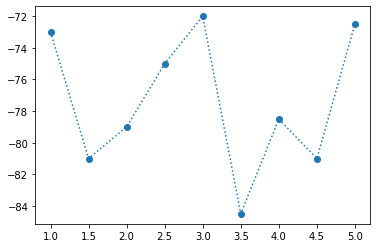

In [59]:
plt.plot(resultados['d(m)'], resultados['RSSI(dBm)'], marker='o', linestyle = ':' )

# RSSI em Função da Distância

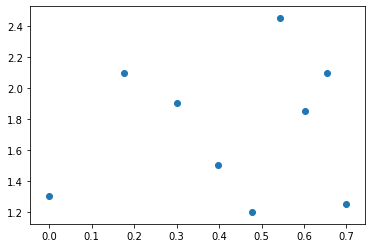

In [60]:
plt.scatter(resultados['x'], resultados['y'])

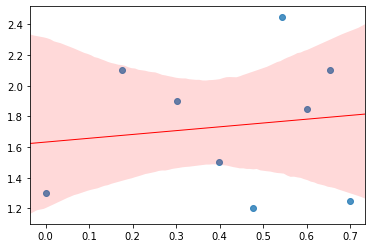

In [61]:
sns.regplot(x=resultados['x'], y=resultados['y'], line_kws={"color":"r","lw":1} )

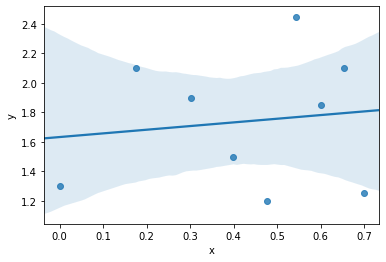

In [62]:
sns.regplot(x=resultadosDataFrame['x'], y=resultadosDataFrame["y"])

In [63]:
arquivo = open('x.txt', 'w')
for i in resultados['x']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [64]:
arquivo = open('y.txt', 'w')
for i in resultados['y']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [65]:
X = resultados['x']
y = resultados['y']

In [66]:
# é necessário adicionar uma constante a matriz X
X_sm = sm.add_constant(X)
# OLS vem de Ordinary Least Squares e o método fit irá treinar o modelo
results = sm.OLS(y, X_sm).fit()
# mostrando as estatísticas do modelo
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                    0.1205
Date:                Fri, 21 Feb 2020   Prob (F-statistic):              0.739
Time:                        14:06:24   Log-Likelihood:                -4.8756
No. Observations:                   9   AIC:                             13.75
Df Residuals:                       7   BIC:                             14.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6326      0.344      4.742      0.002       0.818       2.447
x1             0.2485      0.716      0.347      0.739      -1.444       1.941
==============================================================================
Omnibus:                        1.066   Durbin-Watson:                   2.315
Prob(Omnibus):                  0.587   Jarque-Bera (JB):                0.625
Skew:                           0.063   Prob(JB):                        0.732
Kurtosis:                       1.715   Cond. No.                         5.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# mostrando as previsões para o mesmo conjunto passado
results.predict(X_sm)

array([1.63255912, 1.6763233 , 1.70737449, 1.73145965, 1.75113867,
       1.76777704, 1.78218985, 1.79490285, 1.80627502])

In [68]:
arquivo = open('pL.txt', 'w')
for i in resultados['PL(dB)']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [69]:
arquivo = open('d.txt', 'w')
for i in resultados['d(m)']:
    arquivo.write(str(i)+"\n")
arquivo.close()

In [70]:
η = 1.1313 # eta calculado no octave
pL = []

for d in resultados['d(m)']:
    pl = 1 + 10*η*math.log10(d)
    pL.append(pl)
    
dadosPL = {"PL":pL}
dadosPL['d'] = resultados['d(m)']
dataFramePL = pd.DataFrame(dadosPL)
dataFramePL

,PL,d
0,1.000000,1.0
1,2.992120,1.5
2,4.405552,2.0
3,5.501895,2.5
4,6.397673,3.0
5,7.155042,3.5
6,7.811105,4.0
7,8.389793,4.5
8,8.907448,5.0


In [71]:
arquivo = open('pL.txt', 'w')
for p in pL:
    arquivo.write(str(p)+"\n")
arquivo.close()

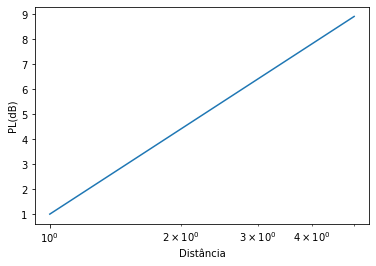

In [72]:
plt.semilogx(dataFramePL['d'],dataFramePL['PL'], basex = 10)
plt.ylabel('PL(dB)')
plt.xlabel('Distância')
plt.savefig('pL(db)Dist.png')

In [73]:
import seaborn as sns; 
tips = {'log(d)': resultados['x'], 'Dif. de Perdas: PL(d), PL(d0)':resultados['y']}
tips = pd.DataFrame(tips)

In [74]:
tips

,log(d),"Dif. de Perdas: PL(d), PL(d0)"
0,0.000000,1.30
1,0.176091,2.10
2,0.301030,1.90
3,0.397940,1.50
4,0.477121,1.20
5,0.544068,2.45
6,0.602060,1.85
7,0.653213,2.10
8,0.698970,1.25


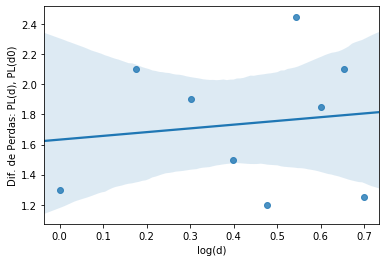

In [75]:
ax = sns.regplot(x="log(d)", y="Dif. de Perdas: PL(d), PL(d0)", data=tips)
plt.savefig('reg.png')